In [60]:
%matplotlib inline
import glob
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

import pandas as pd
import seaborn as sns; sns.set()
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline 
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix

In [2]:
# load dataset containing sex and participant id
df = pd.read_csv("/home/xlajoie/Desktop/Final_HCP_database.csv")

In [3]:
# path to seed-to-voxel matrices

path_to_files = "/home/xlajoie/Desktop/Seeds2voxels_n100"

In [4]:
path_list = glob.glob("Seeds2voxels_n100/*_Seeds2Voxels.nii.gz")
path_list.sort()

In [5]:
# get only the npy files out of the Seeds2voxels folder which also has nii.gz files 

ls_sub = [(file) for file in os.listdir(path_to_files) if file[-3:] == "npy"]

x_correl = []
y_sex = []
for filename in ls_sub:
    sub_id = filename.split("_")[0]
    # if sub_id is in csv
    if len(df.loc[df['subject_label'] == int(sub_id)]) != 0:
        x_correl.append(np.load(os.path.join(path_to_files, filename)).flatten())
        y_sex.append(df.loc[df['subject_label'] == int(sub_id)]["Gender"].values[0])

x_correl = np.asarray(x_correl)
    

In [6]:
print(sum(y_sex), len(y_sex))

40 78


In [8]:
# split the sample o training/test with a 80/20 % ratio 
# and stratify sex by class, also shuffle the data

X_train, X_test, y_train, y_test = train_test_split( 
                                                    x_correl,  # x 
                                                    y_sex,       # y 
                                                    test_size = 0.2, # 80%/20% split 
                                                    shuffle = True,  #shuffle dataset before splitting
                                                    stratify = y_sex,  # keep distribution of sex_class consistent between train and test sets
                                                    random_state = 123) #same shuffle each time 

print('train:', len(X_train),'test:', len(X_test))




train: 62 test: 16


In [20]:
# comparing different # of features for find how many explain the most variance 

score = []
max_feature = int(0.9*len(X_train))
n_components_range = range(0, max_feature, 10) # A range of different values for n_components

for n_comp in tqdm(n_components_range):
    if n_comp=0:
        model = LinearSVC(max_iter=2000)
    else:
        model = Pipeline([
            ('feature_selection', PCA(n_comp)),
            ('prediction', LinearSVC(max_iter=2000))
                      ])
    #score = cross_val_score(model, X_train, y_train, cv=10)
    score.append(cross_val_score(model, X_train, y_train, cv=10, n_job=-1).mean())


  0%|                                                     | 0/5 [00:00<?, ?it/s]/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/sklearn/svm/_base.p

In [32]:
print(score)
x = list(n_components_range)

[0.6952380952380952, 0.6738095238095237, 0.6476190476190476, 0.6095238095238095, 0.6404761904761904]


Text(0, 0.5, 'Prediction')

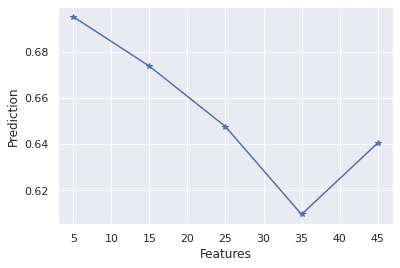

In [41]:
plt.plot(x,score, color = "b", marker = "*")
plt.xlabel("Features")
plt.ylabel("Prediction")

In [66]:
best_ncomp = n_components_range[np.array(score).argmax()]
best_ncomp

5

In [42]:
# Now that we know how many features explain the most variance, we can put the number here 

pca = PCA(n_components=5)  #top 5 which explain the most variance found from the 
pca.fit(x_correl)
X_features = pca.transform(x_correl)
print(X_features)

[[ 1.83326536e+01  3.00440347e+01  5.48792307e+00 -2.52233952e+01
   6.53420580e+00]
 [ 2.11123812e+01 -4.35750575e+00  4.10856546e+00 -2.79086956e+01
   2.04855404e+01]
 [ 5.97243627e+01 -2.61974710e+01  2.24281390e+01 -1.45787973e+00
  -3.48860954e-01]
 [ 9.76210725e+01 -8.91280660e+00  5.56513083e+01 -1.02133974e+01
   3.35810030e+01]
 [-3.72255082e+01  2.58602744e+00  7.74422999e+00  4.82531568e-01
  -8.36806164e+00]
 [ 6.58634120e+00 -2.57628967e+01  5.47391126e+00  9.08724802e+00
   2.03455855e+00]
 [ 4.71007755e+01 -2.38271204e+01 -1.46435173e+01 -4.43105170e+00
   2.59695004e+00]
 [-2.47470286e+01 -2.00507013e+01 -1.49989302e+01  1.41433239e+00
  -2.58615520e+00]
 [ 6.80445110e+01  1.88541168e-02  3.49503199e+00  9.85561075e+00
   2.53064224e+01]
 [-8.52589081e+01 -7.22530595e+00 -1.16377318e+01 -2.56548436e+00
   6.33545270e+00]
 [ 5.91445817e+01 -3.71622659e+01 -2.34445282e+00 -5.30581802e+00
   1.64054051e+01]
 [-8.03197528e+01  2.27362224e+00 -7.91957140e+00 -6.10357023e+00

In [61]:
confusion_matrix(y_test, y_pred)

array([[6, 2],
       [0, 8]])

In [55]:
y_pred


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [57]:
y_test + y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2])

In [77]:
if best_ncomp == 0:
    model = LinearSVC(max_iter=2000)
else:
    model = Pipeline([
            ('feature_selection', PCA(best_ncomp)),
            ('prediction', LinearSVC(max_iter=2000))
                      ])
model.fit(X_train,y_train) #fit the model/ train the model
y_pred = model.predict(X_test)

#calculate the model accuracy
acc = model.score(X_test, y_test)

#compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
df = pd.DataFrame(data=[[tn, fp],[fn,tp]], index= ["True", "False"], columns = ["Positive", "Negative"])
print(df.head())

# print results
print('accuracy (r2) =', acc)



/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


       Positive  Negative
True          7         1
False         2         6
accuracy (r2) = 0.8125


In [50]:
tn, fp, fn, tp = confusion_matrix.ravel()
(tn, fp, fn, tp)

(6, 2, 0, 8)

In [62]:
df = pd.DataFrame(data=[[tn, fp],[fn,tp]], index= ["True", "False"], columns = ["Positive", "Negative"])
df

,Positive,Negative
True,6,2
False,0,8


In [72]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classe

In [73]:
model.get_params()

{'memory': None,
 'steps': [('feature_selection', PCA(n_components=5)),
  ('prediction', LinearSVC(max_iter=2000))],
 'verbose': False,
 'feature_selection': PCA(n_components=5),
 'prediction': LinearSVC(max_iter=2000),
 'feature_selection__copy': True,
 'feature_selection__iterated_power': 'auto',
 'feature_selection__n_components': 5,
 'feature_selection__random_state': None,
 'feature_selection__svd_solver': 'auto',
 'feature_selection__tol': 0.0,
 'feature_selection__whiten': False,
 'prediction__C': 1.0,
 'prediction__class_weight': None,
 'prediction__dual': True,
 'prediction__fit_intercept': True,
 'prediction__intercept_scaling': 1,
 'prediction__loss': 'squared_hinge',
 'prediction__max_iter': 2000,
 'prediction__multi_class': 'ovr',
 'prediction__penalty': 'l2',
 'prediction__random_state': None,
 'prediction__tol': 0.0001,
 'prediction__verbose': 0}